In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, StandardScaler
from sklearn.ensemble import 
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
# Read the hotel dataset
hotel_data = pd.read_csv(r"C:\Users\Prakash Enerprener\OneDrive\Desktop\data science\Tree Based Models & Ensemble Techniques\Decision Tree Algorithms\hotel (1).csv")


                                             |                                             | [  0%]   00:00 ->…


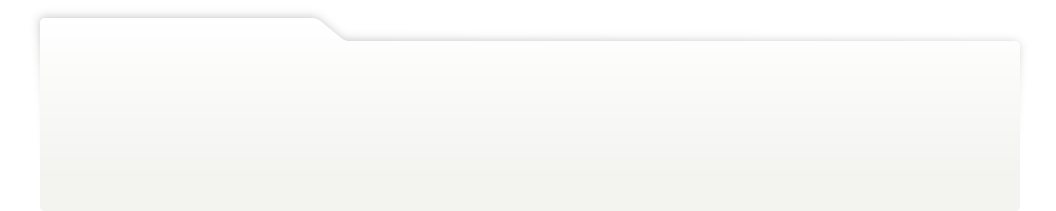
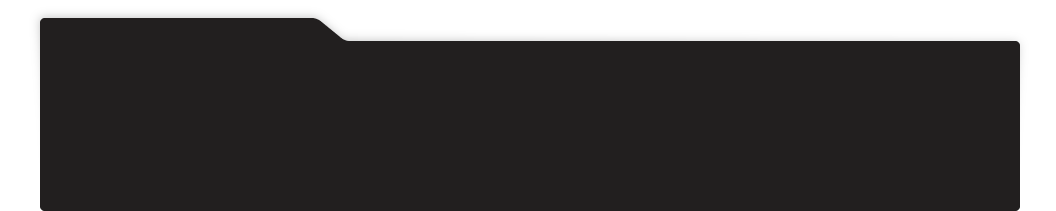
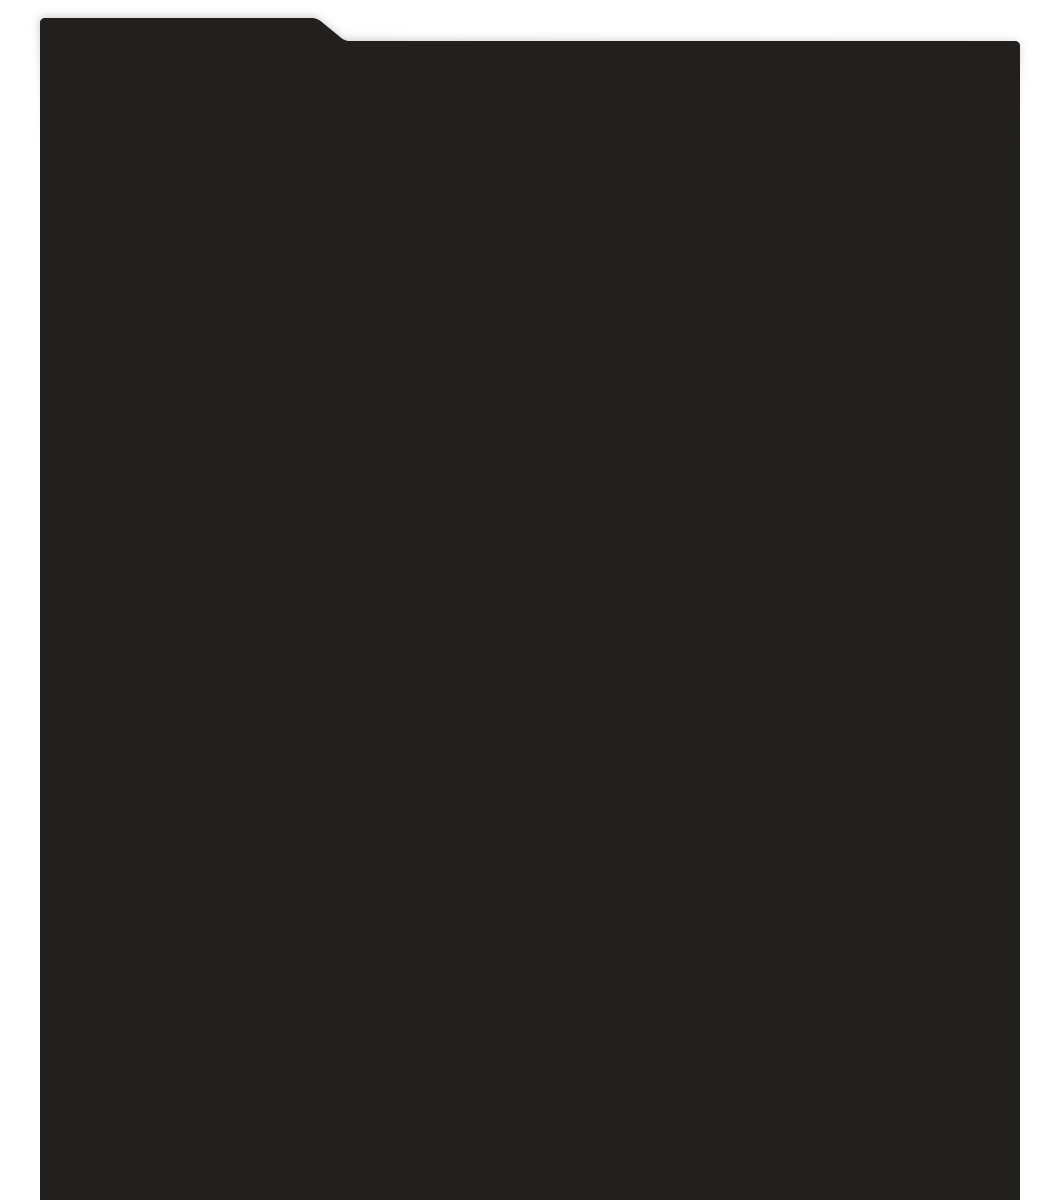
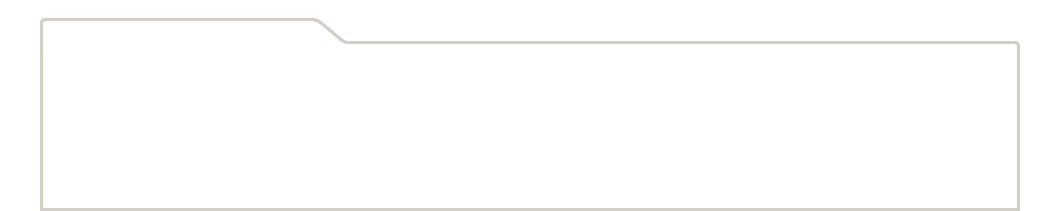
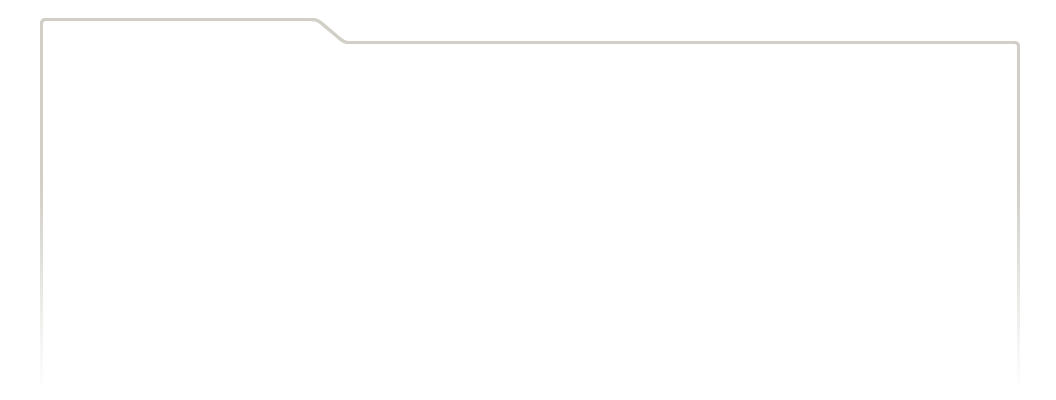
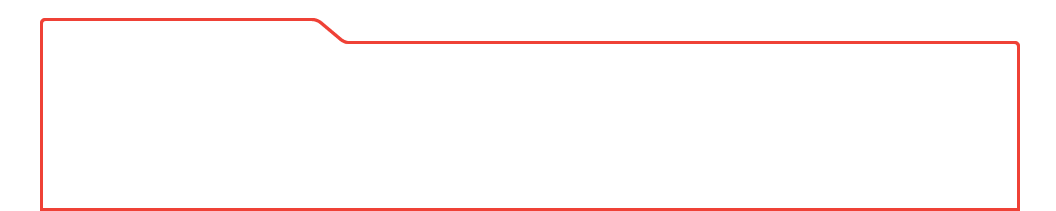
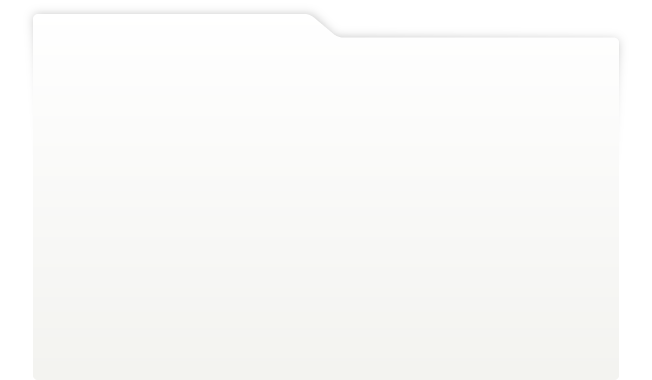
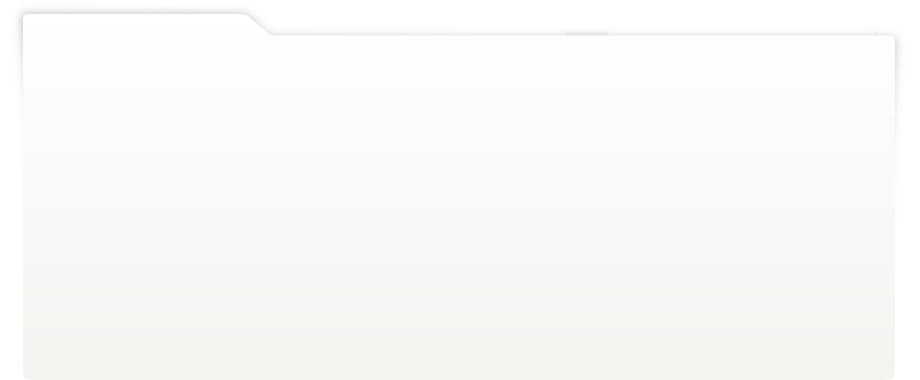
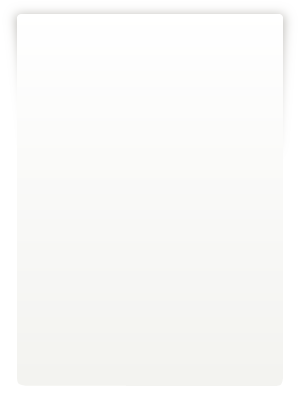
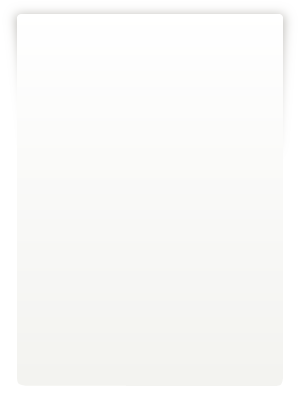
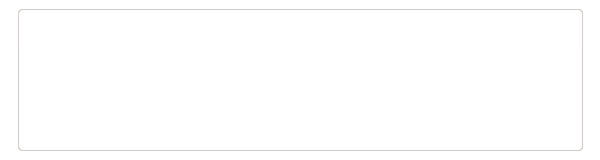
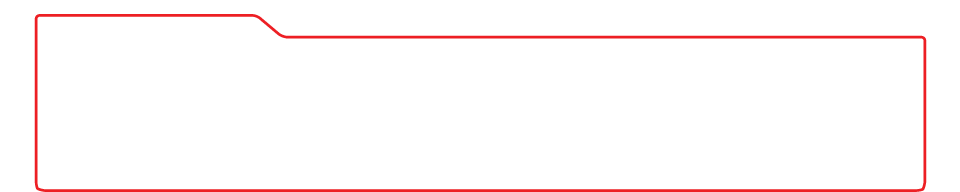
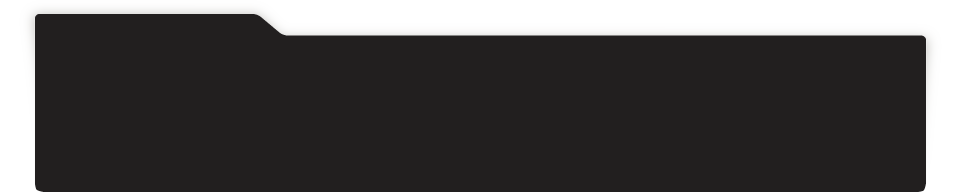
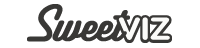
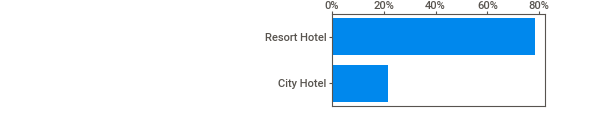
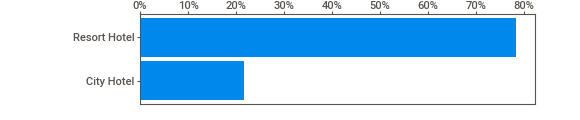
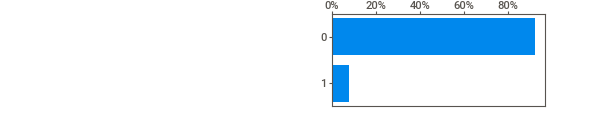
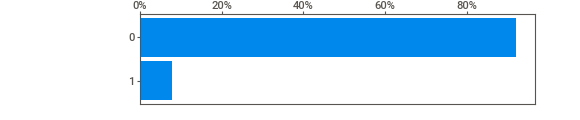
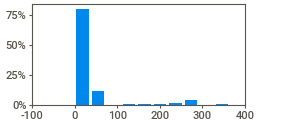
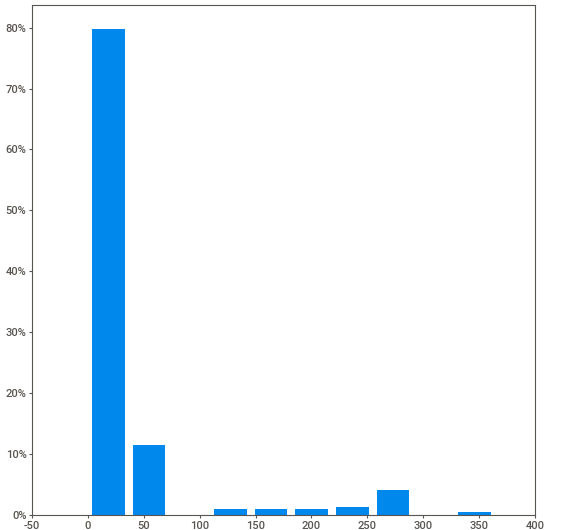
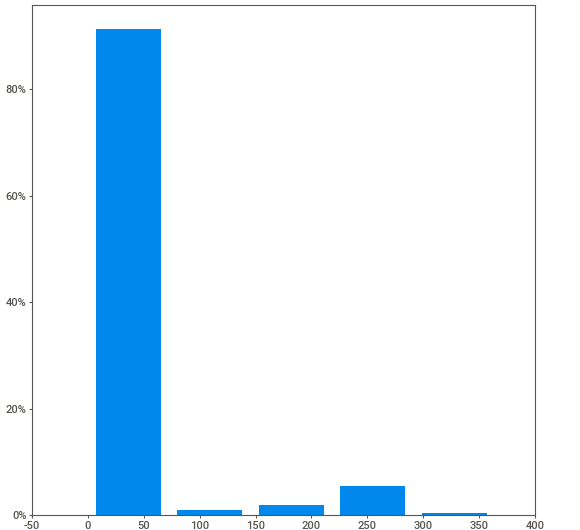
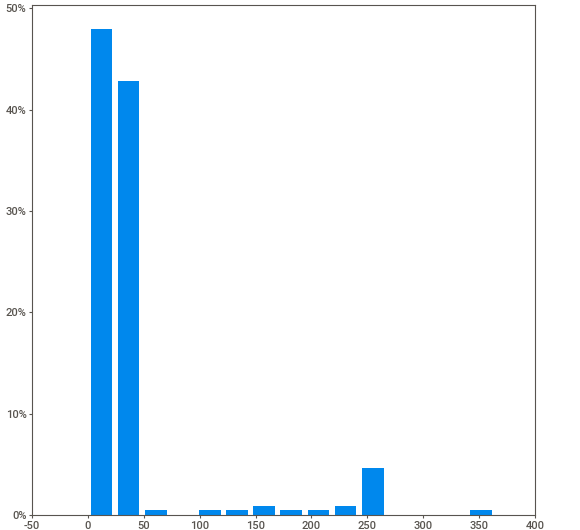
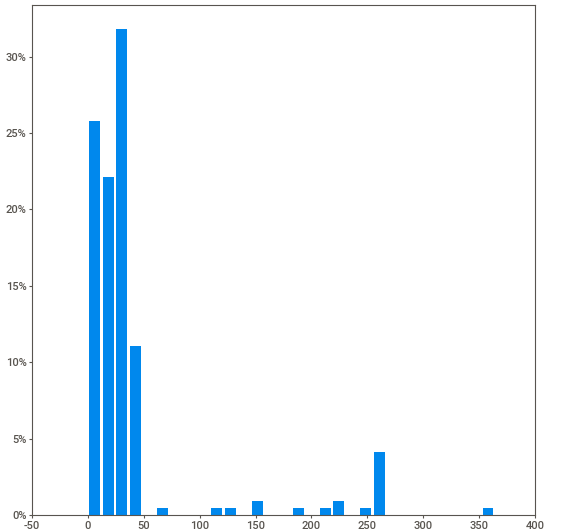
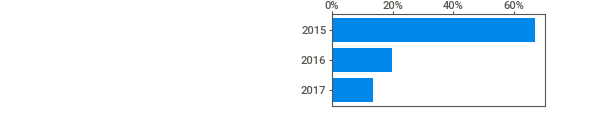
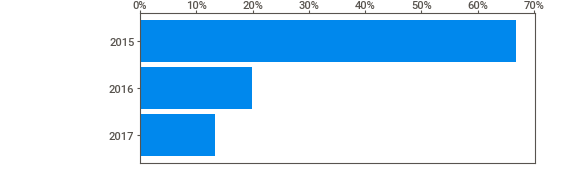
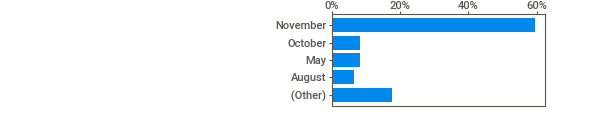
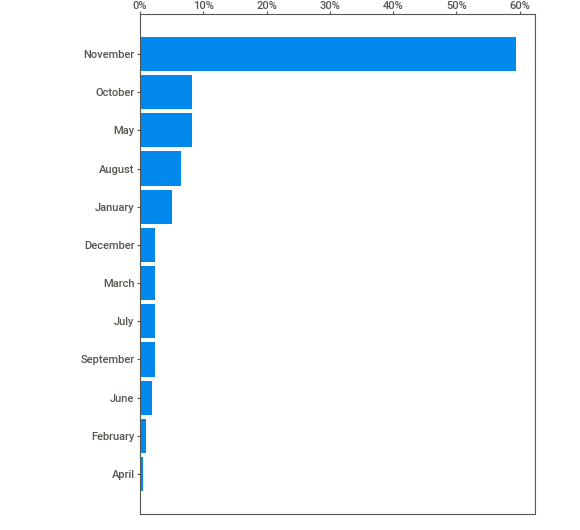
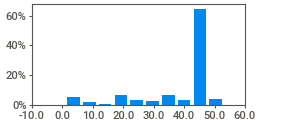
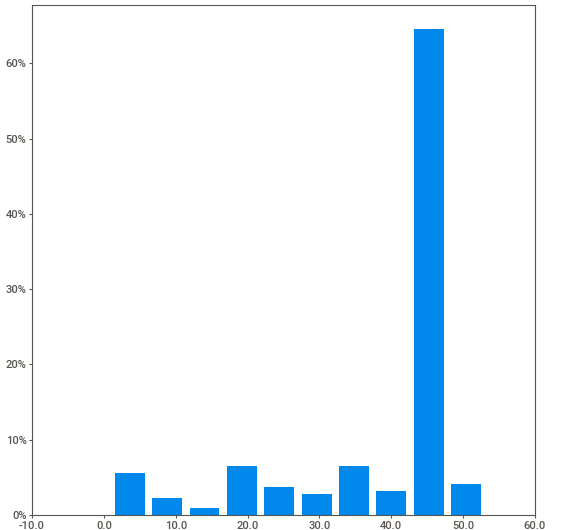
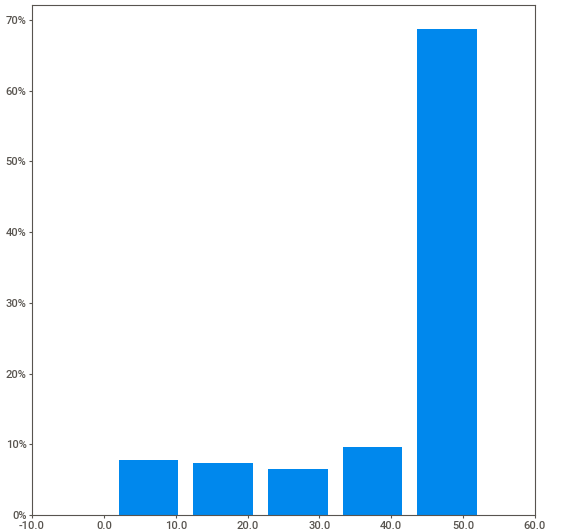
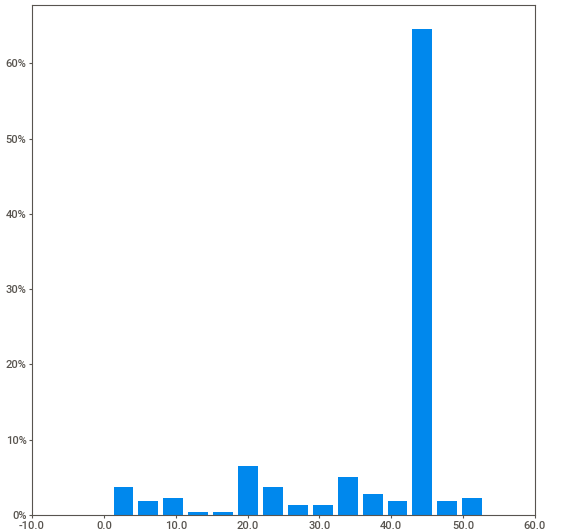
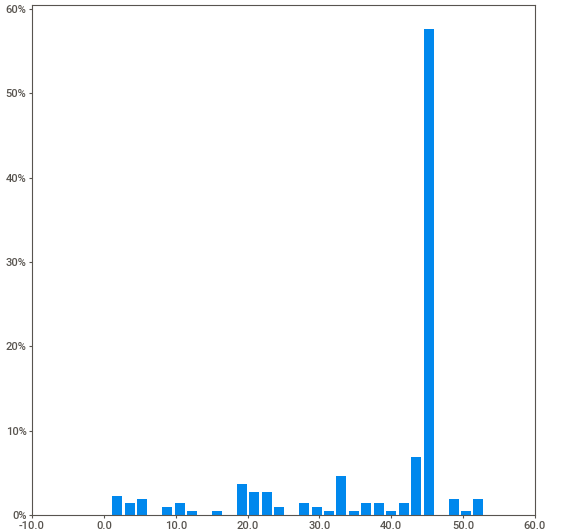
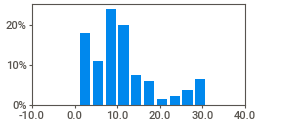
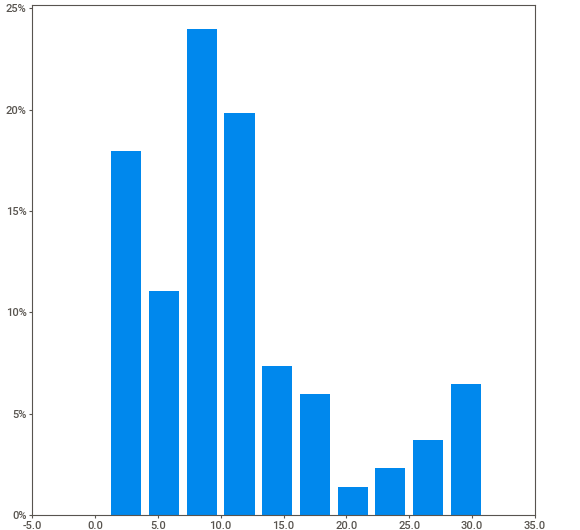
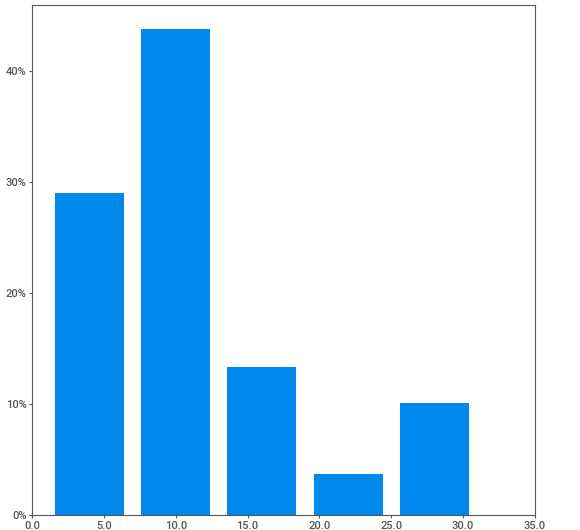
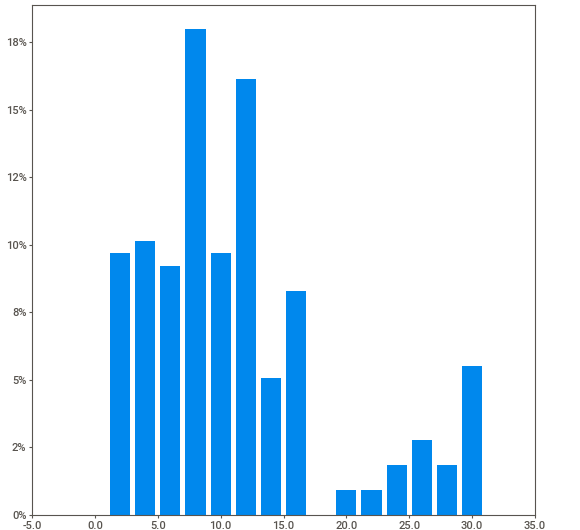
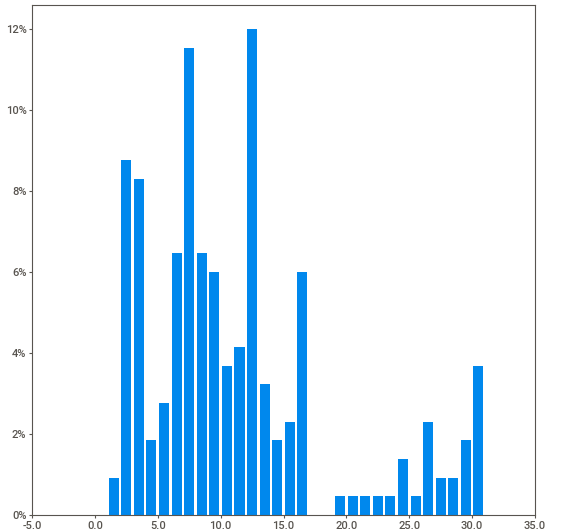
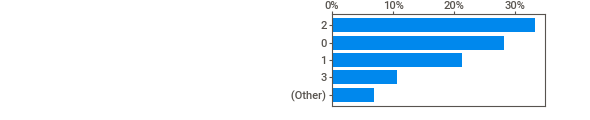
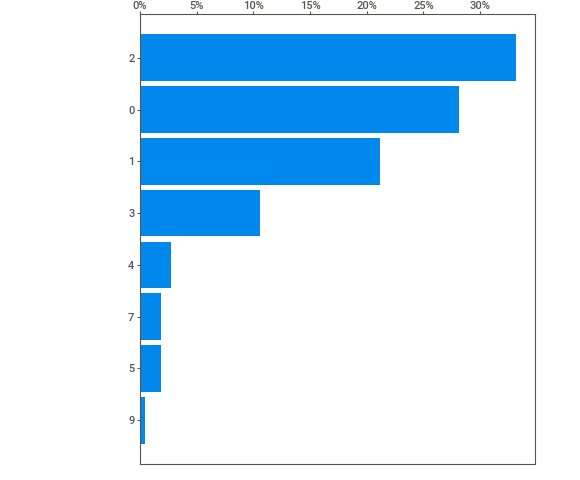
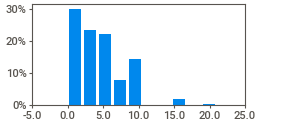
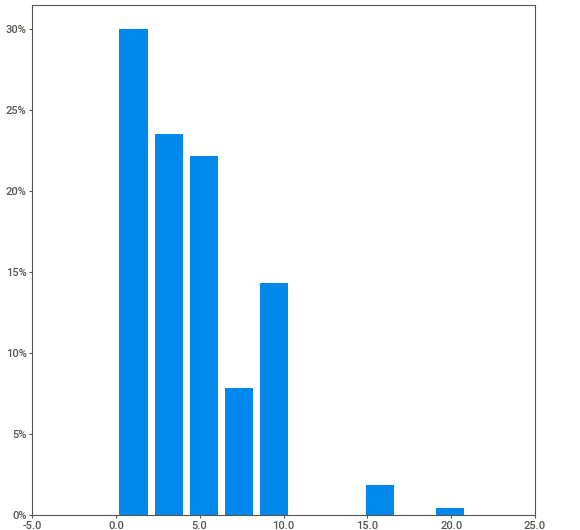
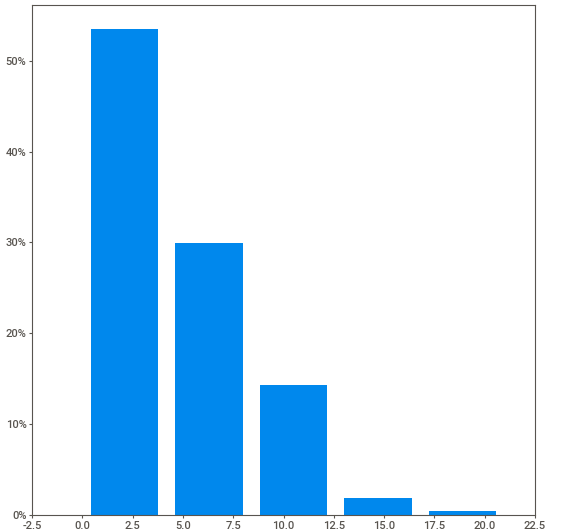
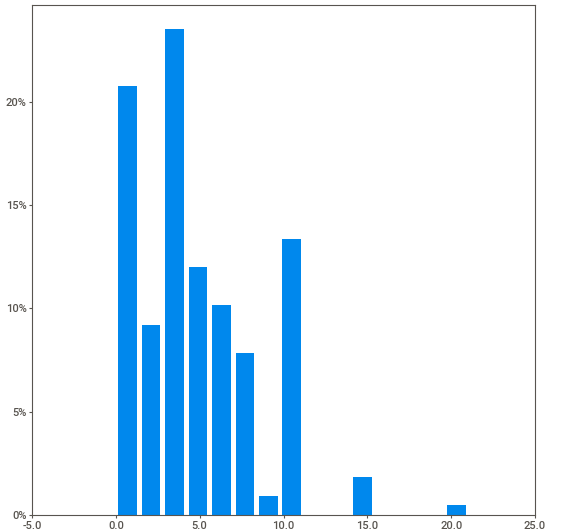
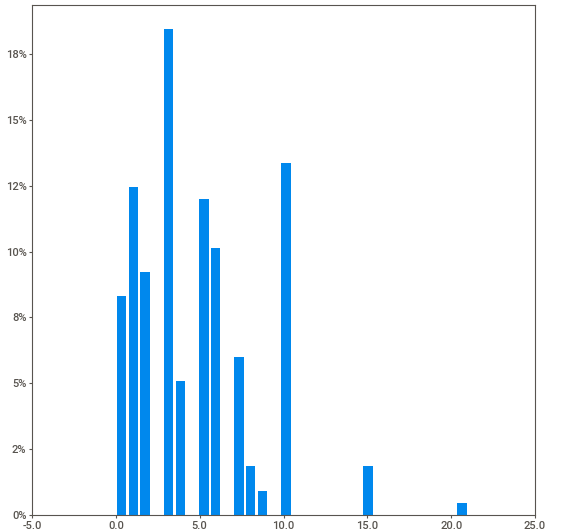
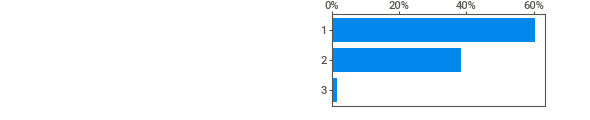
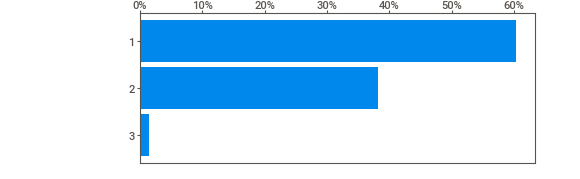
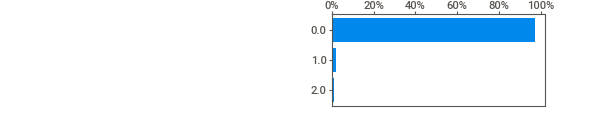
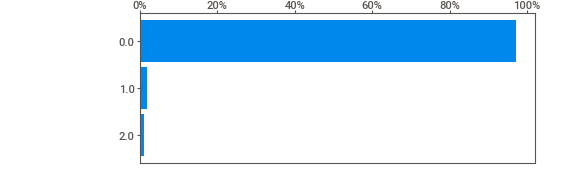
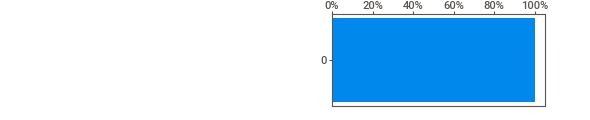
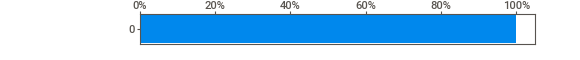
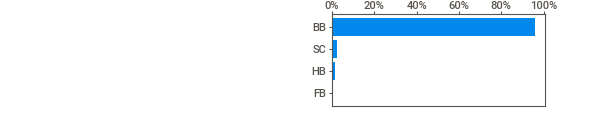
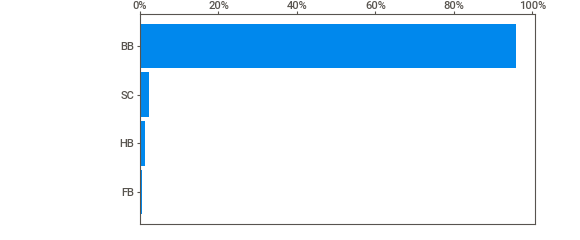
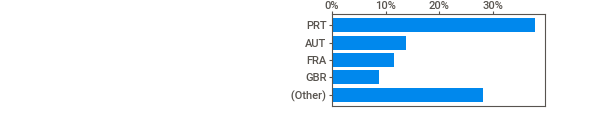
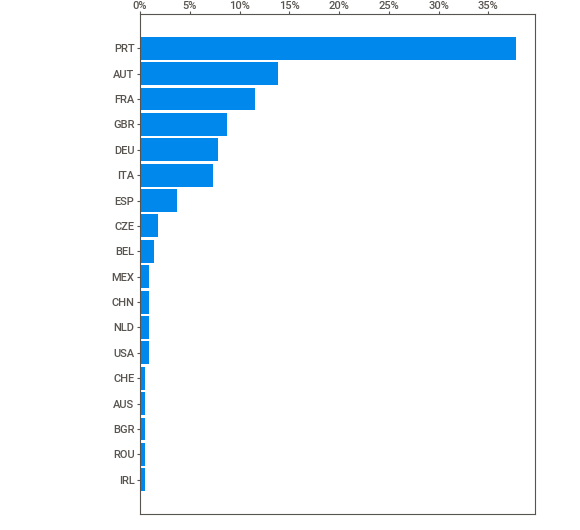
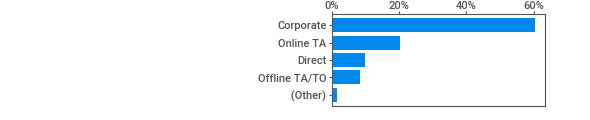
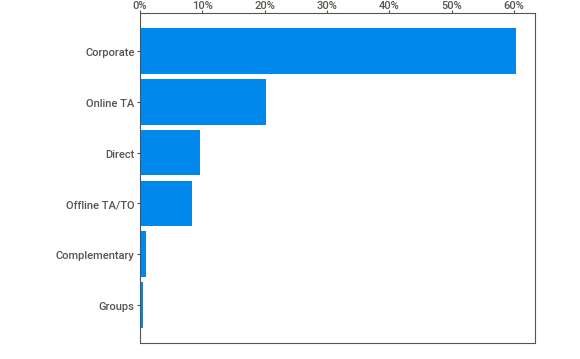
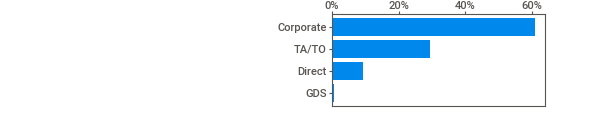
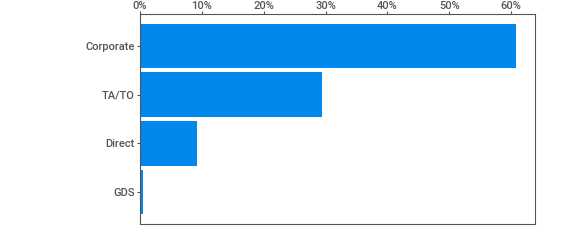
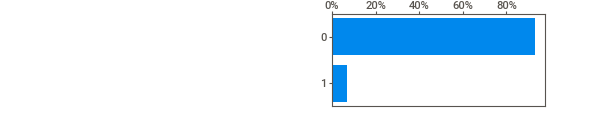
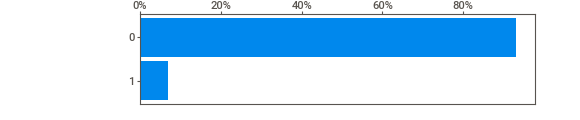
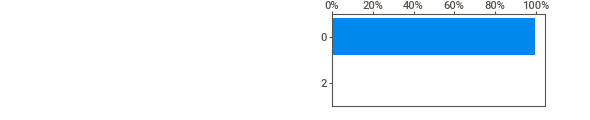
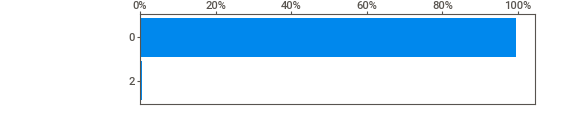
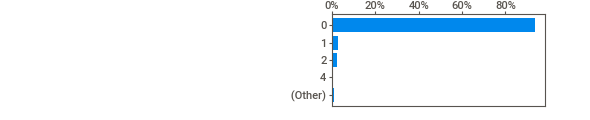
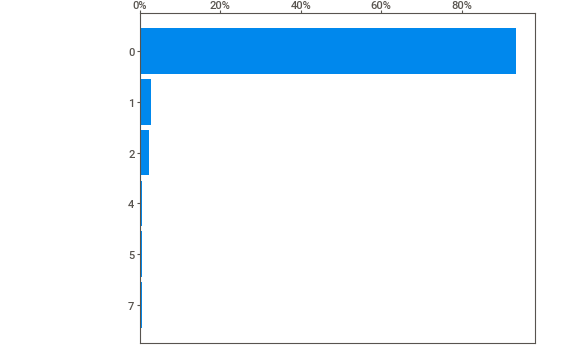
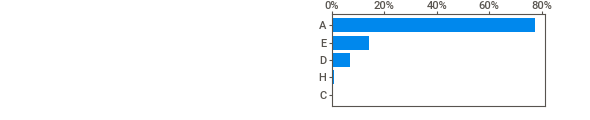
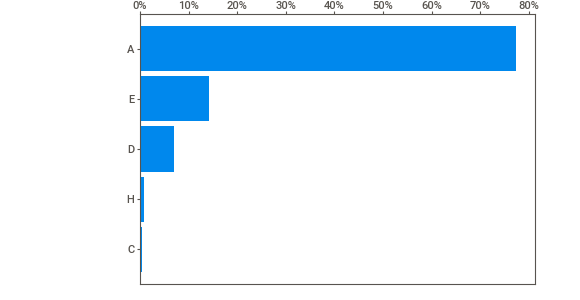
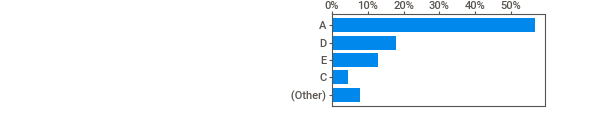
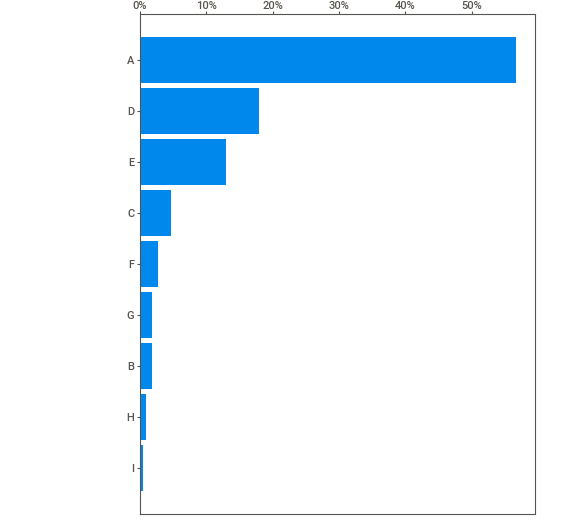
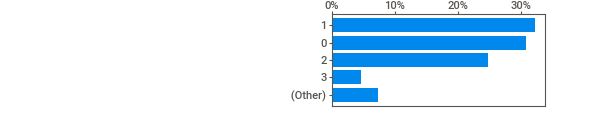
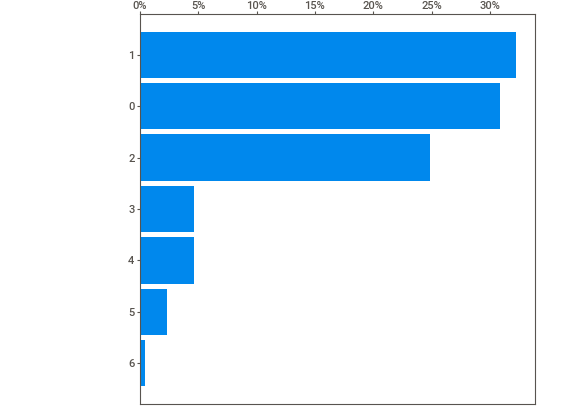
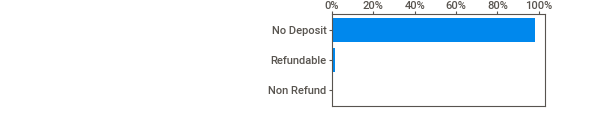
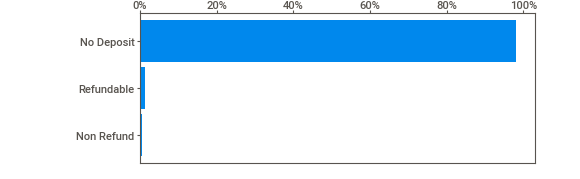
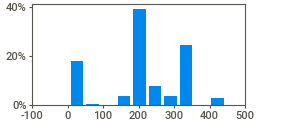
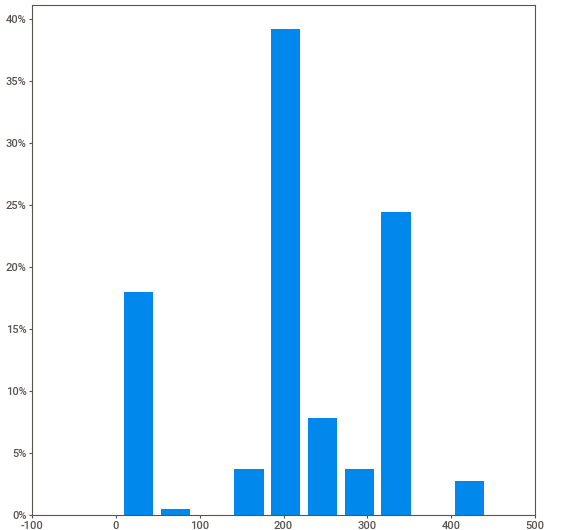
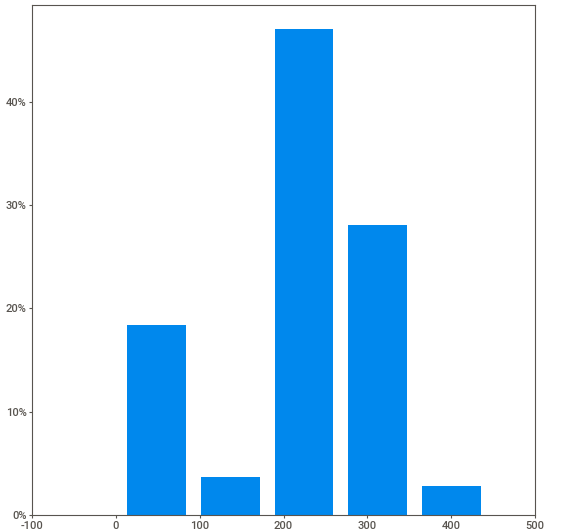
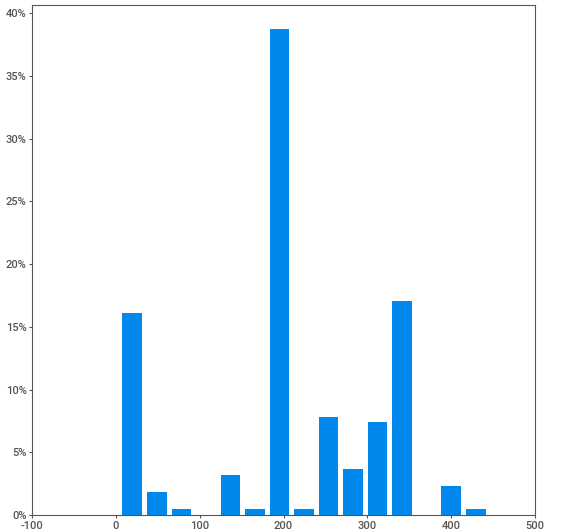
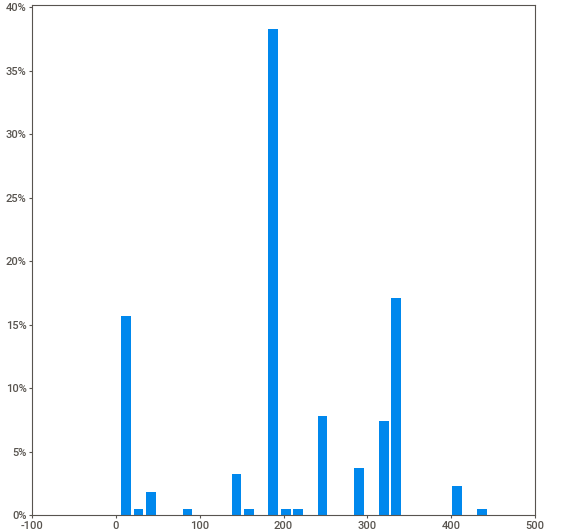
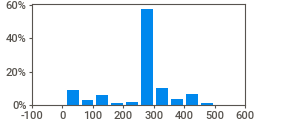
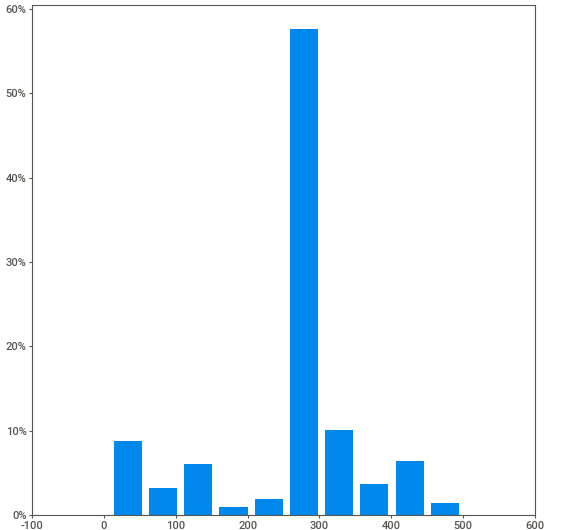
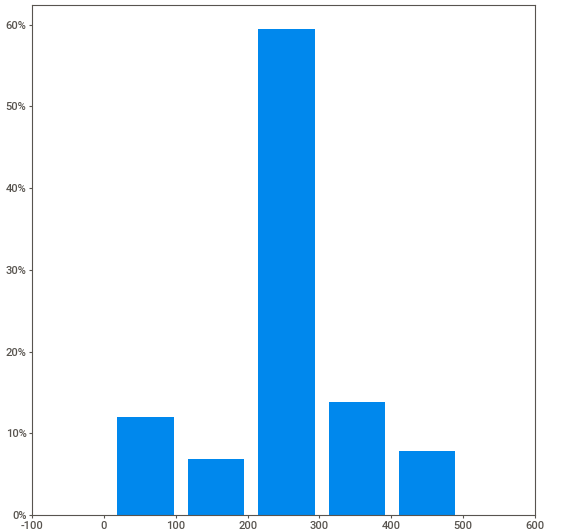
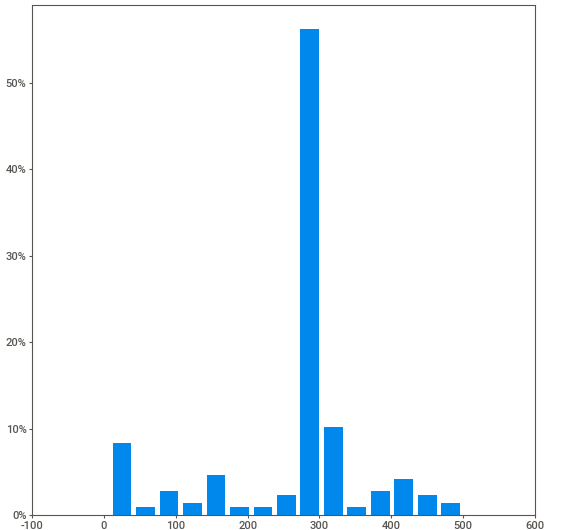
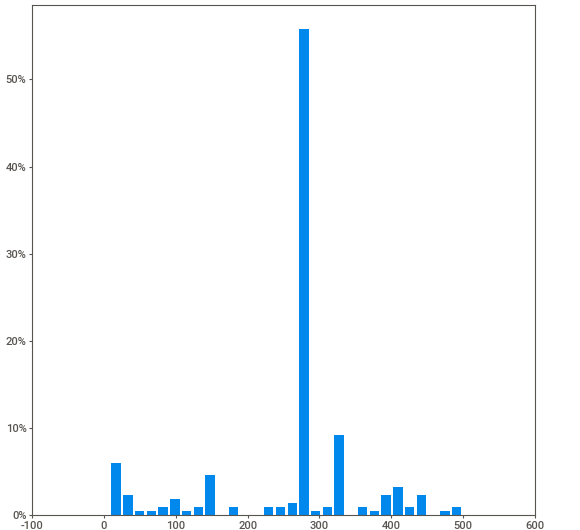
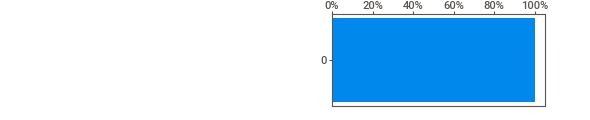
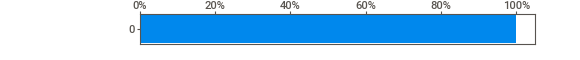
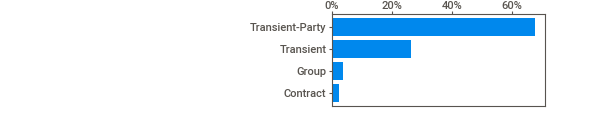
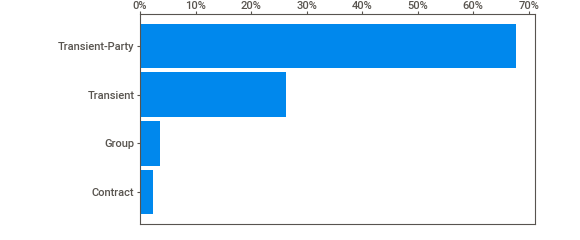
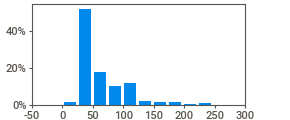
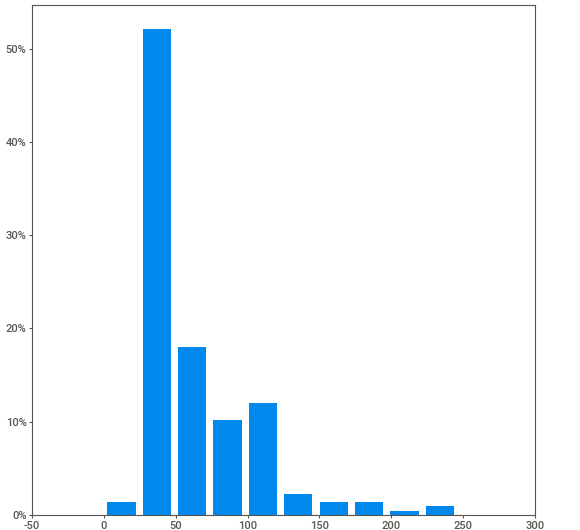
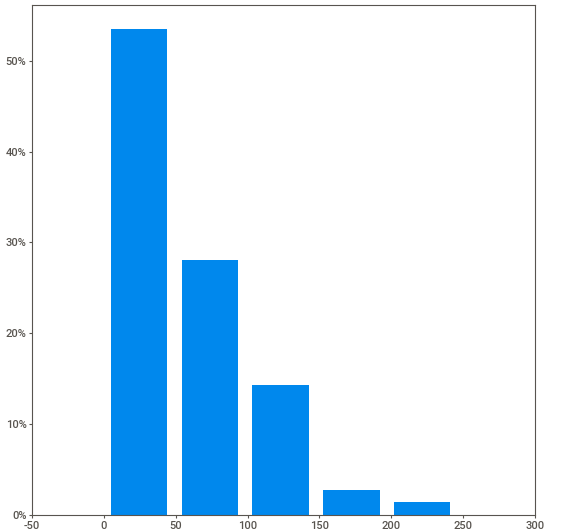
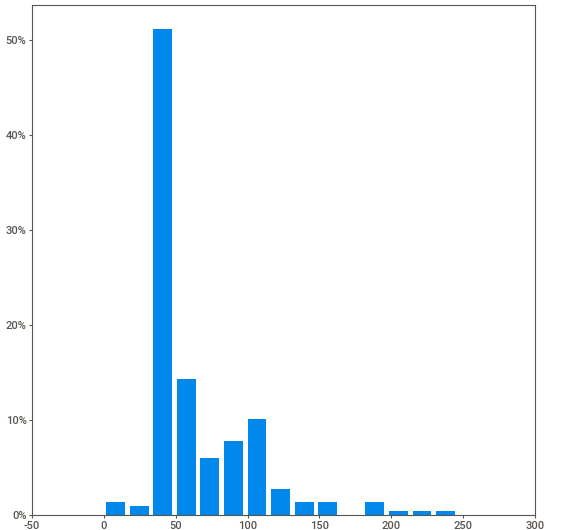
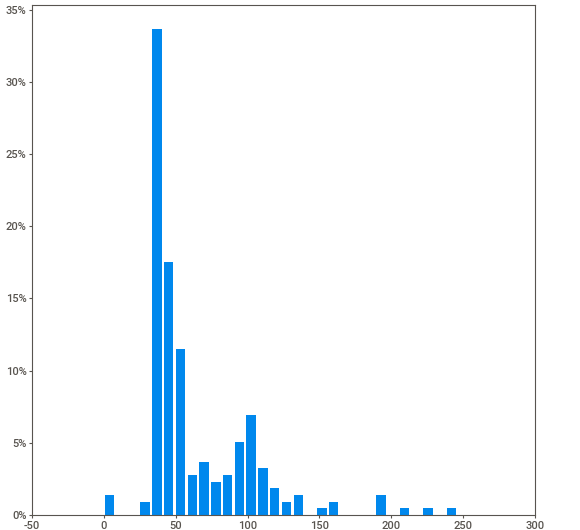
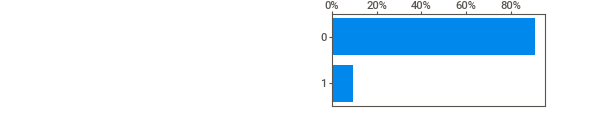
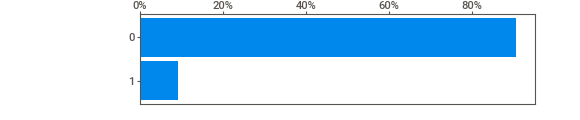
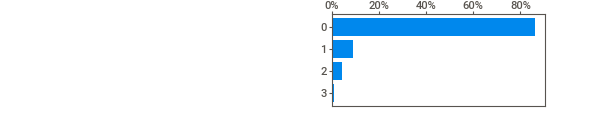
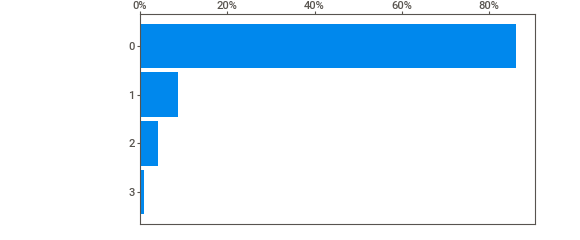
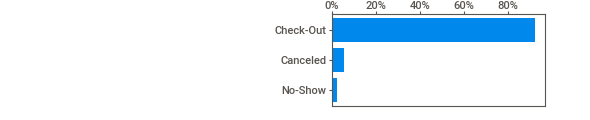
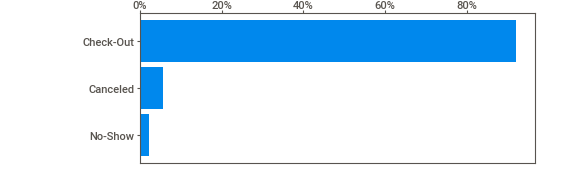
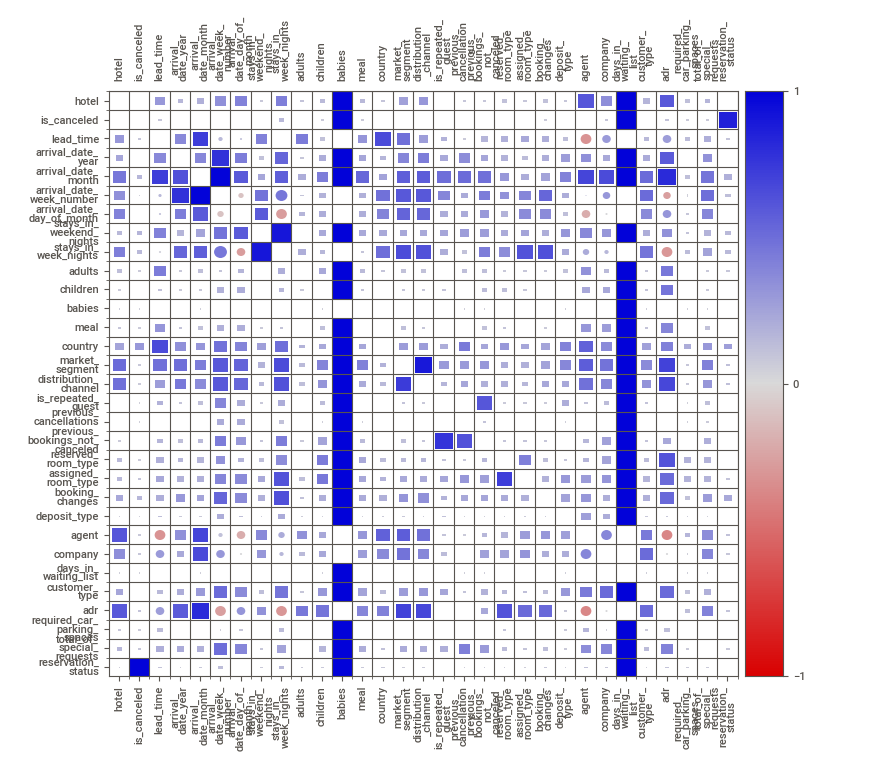
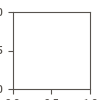

In [64]:
# Exploratory Data Analysis (EDA)
import sweetviz as sv
report=sv.analyze(hotel_data)
report.show_notebook()

In [3]:

# Show Data quality check
print(hotel_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
# Treat missing values
hotel_data.dropna(inplace=True)

In [5]:
# Analyze categorical data
cat_cols=hotel_data.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(hotel_data[col].value_counts())

hotel
Resort Hotel    170
City Hotel       47
Name: count, dtype: int64
arrival_date_month
November     129
October       18
May           18
August        14
January       11
December       5
March          5
July           5
September      5
June           4
February       2
April          1
Name: count, dtype: int64
meal
BB    208
SC      5
HB      3
FB      1
Name: count, dtype: int64
country
PRT    82
AUT    30
FRA    25
GBR    19
DEU    17
ITA    16
ESP     8
CZE     4
BEL     3
MEX     2
CHN     2
NLD     2
USA     2
CHE     1
AUS     1
BGR     1
ROU     1
IRL     1
Name: count, dtype: int64
market_segment
Corporate        131
Online TA         44
Direct            21
Offline TA/TO     18
Complementary      2
Groups             1
Name: count, dtype: int64
distribution_channel
Corporate    132
TA/TO         64
Direct        20
GDS            1
Name: count, dtype: int64
reserved_room_type
A    168
E     31
D     15
H      2
C      1
Name: count, dtype: int64
assigned_room_type
A  

In [6]:
# Transform categorical data using OneHotEncoder
encoder=OneHotEncoder(drop='first',sparse=False)
cat_encoded=pd.DataFrame(encoder.fit_transform(hotel_data[cat_cols]))
cat_encoded.columns=encoder.get_feature_names(cat_cols)

C:\Users\Prakash Enerprener\anaconda4\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [7]:
cat_encoded.tail()

,hotel_Resort Hotel,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,...,reservation_status_date_2017-05-15,reservation_status_date_2017-05-25,reservation_status_date_2017-06-02,reservation_status_date_2017-06-10,reservation_status_date_2017-06-13,reservation_status_date_2017-06-20,reservation_status_date_2017-07-17,reservation_status_date_2017-07-20,reservation_status_date_2017-08-18,reservation_status_date_2017-08-27
212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
215,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
216,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
# Analyze numerical data
num_cols=hotel_data.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    print(hotel_data[col].describe())

count    217.000000
mean       0.078341
std        0.269329
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: is_canceled, dtype: float64
count    217.000000
mean      40.520737
std       61.748375
min        0.000000
25%       12.000000
50%       27.000000
75%       36.000000
max      364.000000
Name: lead_time, dtype: float64
count     217.000000
mean     2015.465438
std         0.720053
min      2015.000000
25%      2015.000000
50%      2015.000000
75%      2016.000000
max      2017.000000
Name: arrival_date_year, dtype: float64
count    217.000000
mean      38.198157
std       12.890292
min        1.000000
25%       33.000000
50%       45.000000
75%       46.000000
max       53.000000
Name: arrival_date_week_number, dtype: float64
count    217.000000
mean      10.824885
std        7.582065
min        1.000000
25%        6.000000
50%        9.000000
75%       13.000000
max       31.000000
Name: arrival_date_day_of_month, dtype:

In [9]:
scaler=PowerTransformer()
num_scaled=scaler.fit_transform(hotel_data[num_cols])
num_scaled=pd.DataFrame(num_scaled,columns=num_cols)
num_scaled

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,-0.291548,-0.889370,-0.648091,0.142351,0.294712,0.539616,-1.864999,1.216144,-0.16863,0.0,-0.272502,-0.068041,-0.262613,0.033988,0.361111,-1.498049,0.0,0.651957,3.138471,2.493384
1,-0.291548,0.078837,-0.648091,0.401294,1.640911,2.340674,2.130715,-0.809064,-0.16863,0.0,-0.272502,-0.068041,-0.262613,0.782495,-0.112116,0.119587,0.0,-0.168079,-0.318626,-0.400534
2,-0.291548,0.078837,-0.648091,0.537175,-1.314471,-1.363713,-0.282035,1.216144,-0.16863,0.0,-0.272502,-0.068041,-0.262613,0.033988,1.143221,0.119587,0.0,-0.306073,-0.318626,-0.400534
3,-0.291548,0.078837,-0.648091,0.537175,-1.314471,0.539616,1.375376,-0.809064,-0.16863,0.0,-0.272502,-0.068041,-0.262613,0.782495,1.094120,0.119587,0.0,-0.591748,-0.318626,-0.400534
4,-0.291548,0.078837,-0.648091,0.537175,-1.314471,1.057665,1.375376,1.216144,-0.16863,0.0,-0.272502,-0.068041,-0.262613,0.782495,1.077731,0.119587,0.0,-0.306073,-0.318626,-0.400534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,-0.291548,-0.381182,2.135404,-1.633363,1.506896,-1.363713,-1.156606,1.216144,-0.16863,0.0,-0.272502,-0.068041,-0.262613,-1.297416,-1.806609,2.471480,0.0,1.979855,-0.318626,2.493384
213,-0.291548,-0.381182,2.135404,-1.584164,1.826593,-0.176511,-0.282035,-0.809064,-0.16863,0.0,-0.272502,-0.068041,-0.262613,0.033988,0.780713,-1.200864,0.0,0.949461,-0.318626,-0.400534
214,-0.291548,-0.381182,2.135404,-1.584164,1.826593,-0.176511,-0.282035,1.216144,-0.16863,0.0,-0.272502,-0.068041,-0.262613,0.033988,0.780713,-1.200864,0.0,1.261953,-0.318626,-0.400534
215,-0.291548,2.086977,2.135404,-1.531780,0.011311,-1.363713,-1.156606,1.216144,-0.16863,0.0,-0.272502,-0.068041,-0.262613,-1.297416,-1.747333,-0.427895,0.0,1.726978,-0.318626,-0.400534


In [10]:
# Scale the data
feauteres=pd.concat([cat_encoded,num_scaled],axis=1)
feauteres_cols=feauteres.columns
feauteres_cols

Index(['hotel_Resort Hotel', 'arrival_date_month_August',
       'arrival_date_month_December', 'arrival_date_month_February',
       'arrival_date_month_January', 'arrival_date_month_July',
       'arrival_date_month_June', 'arrival_date_month_March',
       'arrival_date_month_May', 'arrival_date_month_November',
       ...
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object', length=154)

In [11]:
scaler=StandardScaler()
scaled_feauters=scaler.fit_transform(feauteres)
scaled_feauters=pd.DataFrame(scaled_feauters,columns=feauteres_cols)
scaled_feauters

,hotel_Resort Hotel,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0.525805,-0.262613,-0.153574,-0.096449,-0.23108,-0.153574,-0.137038,-0.153574,-0.300753,-1.210747,...,-0.272502,-0.068041,-0.262613,0.033988,0.361111,-1.498049,0.0,0.651957,3.138471,2.493384
1,0.525805,-0.262613,-0.153574,-0.096449,-0.23108,-0.153574,-0.137038,-0.153574,-0.300753,-1.210747,...,-0.272502,-0.068041,-0.262613,0.782495,-0.112116,0.119587,0.0,-0.168079,-0.318626,-0.400534
2,0.525805,-0.262613,-0.153574,-0.096449,-0.23108,-0.153574,-0.137038,-0.153574,-0.300753,0.825936,...,-0.272502,-0.068041,-0.262613,0.033988,1.143221,0.119587,0.0,-0.306073,-0.318626,-0.400534
3,0.525805,-0.262613,-0.153574,-0.096449,-0.23108,-0.153574,-0.137038,-0.153574,-0.300753,0.825936,...,-0.272502,-0.068041,-0.262613,0.782495,1.094120,0.119587,0.0,-0.591748,-0.318626,-0.400534
4,0.525805,-0.262613,-0.153574,-0.096449,-0.23108,-0.153574,-0.137038,-0.153574,-0.300753,0.825936,...,-0.272502,-0.068041,-0.262613,0.782495,1.077731,0.119587,0.0,-0.306073,-0.318626,-0.400534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,-1.901847,-0.262613,-0.153574,-0.096449,-0.23108,-0.153574,-0.137038,-0.153574,3.324990,-1.210747,...,-0.272502,-0.068041,-0.262613,-1.297416,-1.806609,2.471480,0.0,1.979855,-0.318626,2.493384
213,-1.901847,-0.262613,-0.153574,-0.096449,-0.23108,-0.153574,-0.137038,-0.153574,3.324990,-1.210747,...,-0.272502,-0.068041,-0.262613,0.033988,0.780713,-1.200864,0.0,0.949461,-0.318626,-0.400534
214,-1.901847,-0.262613,-0.153574,-0.096449,-0.23108,-0.153574,-0.137038,-0.153574,3.324990,-1.210747,...,-0.272502,-0.068041,-0.262613,0.033988,0.780713,-1.200864,0.0,1.261953,-0.318626,-0.400534
215,-1.901847,-0.262613,-0.153574,-0.096449,-0.23108,-0.153574,7.297260,-0.153574,-0.300753,-1.210747,...,-0.272502,-0.068041,-0.262613,-1.297416,-1.747333,-0.427895,0.0,1.726978,-0.318626,-0.400534


In [24]:
X=scaled_feauters
y=hotel_data['is_canceled']

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [26]:
y.value_counts()

is_canceled
0    200
1     17
Name: count, dtype: int64

In [31]:
! pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 393.8 kB/s eta 0:04:14
   ---------------------------------------- 0.1/99.8 MB 655.4 kB/s eta 0:02:33
   ---------------------------------------- 0.2/99.8 MB 952.6 kB/s eta 0:01:45
   ---------------------------------------- 0.2/99.8 MB 1.1 MB/s eta 0:01:34
   ---------------------------------------- 0.3/99.8 MB 1.0 MB/s eta 0:01:36
   ---------------------------------------- 0.4/99.8 MB 1.1 MB/s eta 0:01:29
   ---------------------------------------- 0.4/99.8 MB 1.2 MB/s eta 0:01:24
   ---------------------------------------- 0.4/99.8 MB 1.2 MB/s eta 0:01:24
   ------------------------------

In [36]:
import xgboost as xgp

In [37]:
train_dm=xgp.DMatrix(X_train,y_train,feature_names=list(X_train.columns))

In [39]:
xgp_params={
    'eta':0.3,
    'max_depth':6,
    'min_child_weight':1,
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'seed':1,
    'silent':1
}

In [42]:
cv_results=xgp.cv(xgp_params,train_dm,num_boost_round=100,nfold=5,metrics={'auc'},seed=123)
cv_results

C:\Users\Prakash Enerprener\anaconda4\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:28:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0
...,...,...,...,...
95,1.0,0.0,1.0,0.0
96,1.0,0.0,1.0,0.0
97,1.0,0.0,1.0,0.0
98,1.0,0.0,1.0,0.0


In [45]:
np.max(cv_results['test-auc-mean'])

1.0

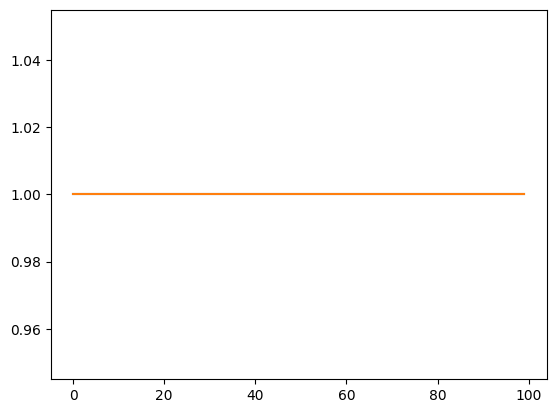

In [48]:
plt.plot(cv_results['train-auc-mean'])
plt.plot(cv_results['test-auc-mean'])

In [56]:
# Apply the XGBoost Model
model = xgp.XGBClassifier(random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [63]:
# Evaluate the model using the performance metrics
y_pred = model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

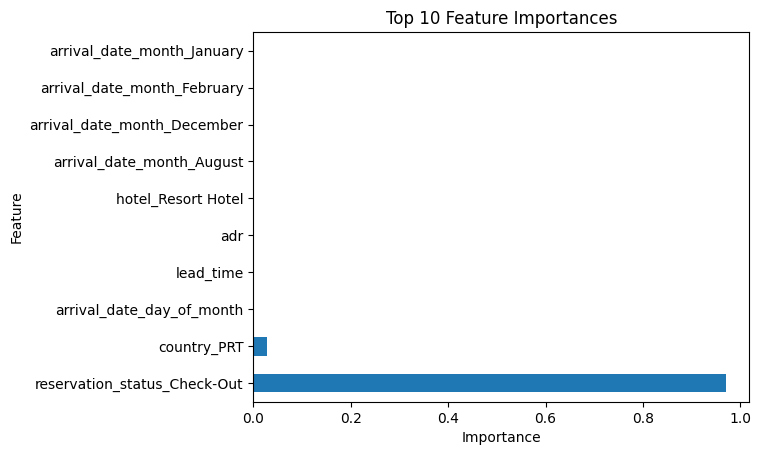

In [60]:
# Visualize the feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [61]:

# Success Metrics
success_metrics = {'ROC AUC': roc_auc, 'Accuracy': accuracy}
success_metrics

{'ROC AUC': 1.0, 'Accuracy': 1.0}